In [1]:
%cd "../"
%pwd

import numpy as np
import matplotlib.pyplot as plt

import io 
import pandas as pd  
import pyreadr

from load_data import *
from pred_score import *
from Filter_FS import *
from hybrid_FS import *
from overlap_genes import *
from crossValidation import *

/Users/dormann/Documents/GitHub/src


In [2]:
#Fixing seed to get reproducible results
random.seed(3)
np.random.seed(3)

# Baseline with preselected genes 

In [3]:
#Load preprocess data
LK = np.array(pd.read_csv ('../data/processed_data/LK.csv'))
y = np.array(LK[:,-1],dtype=int)
LK = LK[:,0:-1]


In [5]:
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(LK,y)

In [6]:
print(LK.shape, len(pred))
acc = model.score_
print(acc, model.recovery)

(610, 8405) 610
0.20603015075376885 0.8131147540983606


In [6]:
print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (135.0, 651.0, 0.2073732718894009, 0.4671280276816609, 0.9866305218409217, 0.1717557251908397, 0.9968047140841564, 0.8282442748091603, 0.532871972318339)


# Mutual information maximizer (MIM)

test 0.3262144110124667 0.03177615444134096
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (183.0, 524.0, 0.34923664122137404, 0.41876430205949655, 0.9928132543339917, 0.25884016973125884, 0.9965034002367776, 0.7411598302687411, 0.5812356979405034)


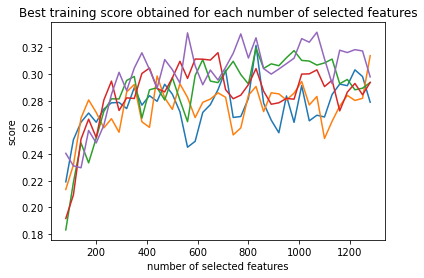

In [7]:
#Define parameters for MIM method
N = np.arange(80,1300,30)
kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'n_neighbors': 4, 'plot': True} 

subset, score_training, score_testing = cross_validation(y,LK, FamiliesClusters, compute_precision,True, 5,  MIM, **kwargs)

mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
print('test', mean_score_test, std_score_test)

#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = LK[:, subset]
pred = model.fit_predict(x_subset,y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))


1
test 0.3939524758378147 0.029394055764555612
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (184.0, 495.0, 0.3717171717171717, 0.4339622641509434, 0.9932847665947662, 0.2709867452135493, 0.9967328269215062, 0.7290132547864506, 0.5660377358490566)


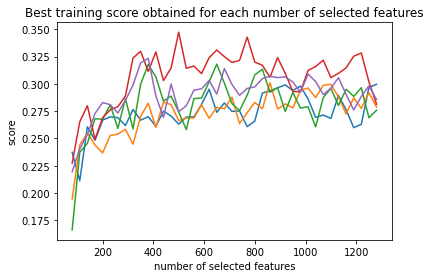

2
test 0.3758859674109795 0.05280303087208657
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (200.0, 495.0, 0.40404040404040403, 0.45146726862302483, 0.9930625630676084, 0.28776978417266186, 0.9965822784810127, 0.7122302158273381, 0.5485327313769752)


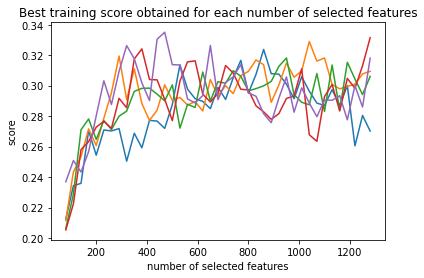

3
test 0.3901225779986828 0.054652354572048846
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (181.0, 487.0, 0.37166324435318276, 0.44362745098039214, 0.9929872561019512, 0.27095808383233533, 0.9967189419671895, 0.7290419161676647, 0.5563725490196079)


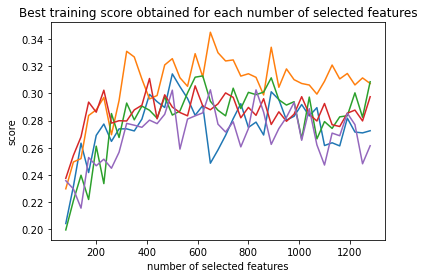

4
test 0.3773471530588701 0.04683777179803805
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (192.0, 469.0, 0.4093816631130064, 0.42761692650334077, 0.9940018672225703, 0.29046898638426627, 0.9967042408853666, 0.7095310136157338, 0.5723830734966593)


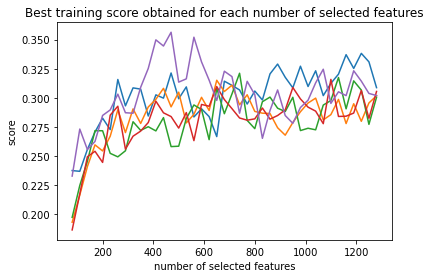

5
test 0.3514448429968011 0.06543196332762041
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (180.0, 514.0, 0.35019455252918286, 0.4466501240694789, 0.9923002022320425, 0.25936599423631124, 0.9966448001925855, 0.7406340057636888, 0.5533498759305211)


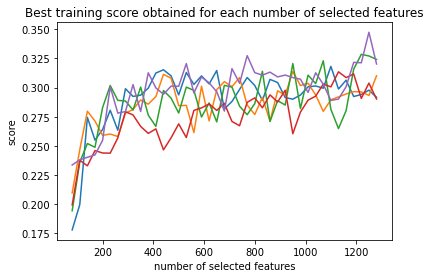

6
test 0.38085084972565875 0.02506670084255766
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (210.0, 495.0, 0.42424242424242425, 0.4656319290465632, 0.992938155360582, 0.2978723404255319, 0.9965493048495869, 0.7021276595744681, 0.5343680709534369)


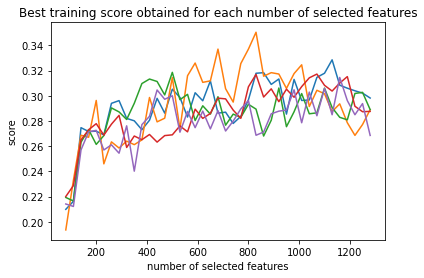

7
test 0.38217163970124324 0.05323189550410847
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (191.0, 488.0, 0.39139344262295084, 0.4340909090909091, 0.9934500161065177, 0.2812960235640648, 0.9966471419915168, 0.7187039764359352, 0.5659090909090909)


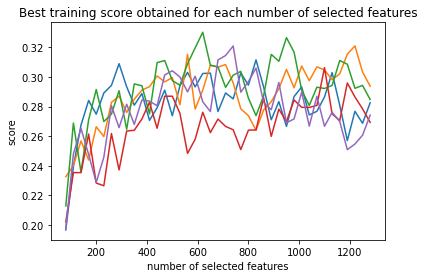

8
test 0.40046893048394894 0.06994931395276038
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (212.0, 486.0, 0.43621399176954734, 0.48623853211009177, 0.9927626876340243, 0.3037249283667622, 0.9966512184182987, 0.6962750716332379, 0.5137614678899083)


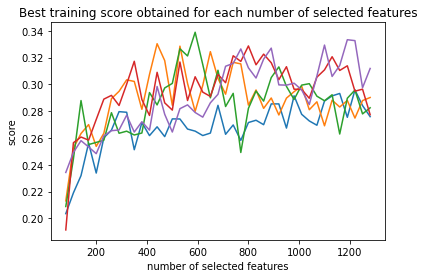

9
test 0.36428123664316275 0.023837147415946794
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (175.0, 490.0, 0.35714285714285715, 0.37393162393162394, 0.9941022832589098, 0.2631578947368421, 0.9964650242501749, 0.7368421052631579, 0.6260683760683761)


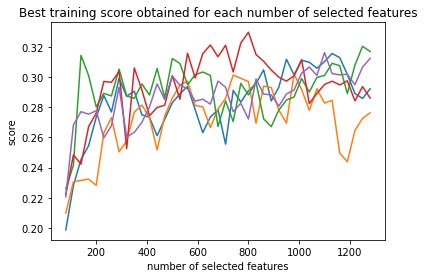

10
test 0.3883282430019885 0.028461126832040273
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (187.0, 505.0, 0.3702970297029703, 0.4495192307692308, 0.992740184873708, 0.2702312138728324, 0.9966948112867143, 0.7297687861271677, 0.5504807692307693)


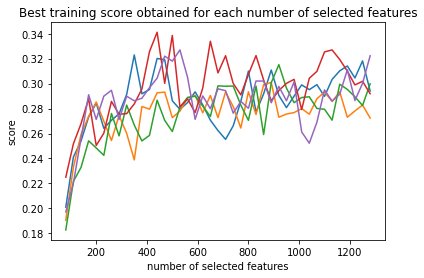

11
test 0.3602554766822156 0.04586799073305091
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (178.0, 523.0, 0.3403441682600382, 0.45758354755784064, 0.9924319161867277, 0.25392296718972895, 0.9969328720527953, 0.746077032810271, 0.5424164524421594)


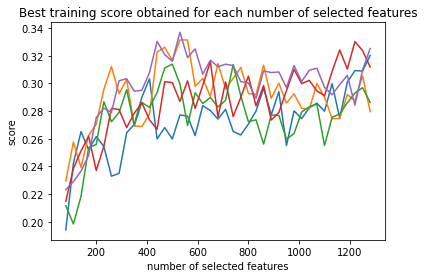

12
test 0.3935878642276392 0.06931626865691604
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (191.0, 512.0, 0.373046875, 0.45584725536992843, 0.9927676465187236, 0.2716927453769559, 0.9967663702506063, 0.7283072546230441, 0.5441527446300716)


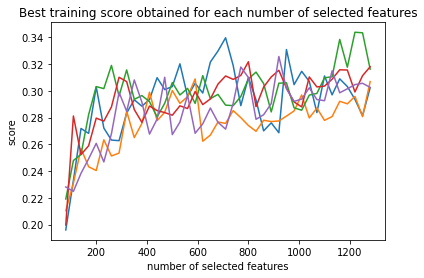

In [8]:
neighbors =  np.arange(1,13,1)
score_plot = []

for p in neighbors:
    print(p)
    #Define parameters for MIM method
    N = np.arange(80,1300,30)
    kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'n_neighbors': 3, 'plot': True} 

    subset, score_training, score_testing = cross_validation(y,LK, FamiliesClusters, compute_precision,True, 5,  MIM, **kwargs)

    mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
    print('test', mean_score_test, std_score_test)

    #Predict and evaluate on whole data  set
    model = FamiliesClusters(np.unique(y),compute_precision,True)
    x_subset = LK[:, subset]
    pred = model.fit_predict(x_subset,y)

    print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))
    plt.show()

# Anova F test

test 0.38001348685292 0.05363902610590172
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (163.0, 523.0, 0.31166347992351817, 0.41265822784810124, 0.9925621480175209, 0.23760932944606414, 0.9966868975365941, 0.7623906705539358, 0.5873417721518988)


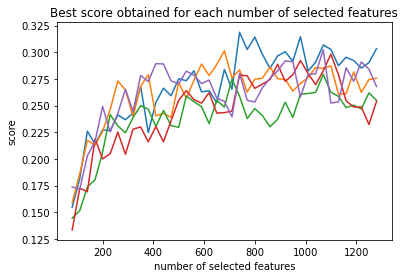

In [9]:
#Define parameters for ANOVA method
N = np.arange(80,1300,30)
kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'plot': True} 

subset, score_training, score_testing = cross_validation(y,LK, FamiliesClusters, compute_precision,True, 5,  ANOVA, **kwargs)

mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
print('test', mean_score_test, std_score_test)

#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = LK[:, subset]
pred = model.fit_predict(x_subset,y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))    

# Without Cross-validation

In [3]:
libraries_LK = ['Weinreb_LK_D2_exp1_library_d2_1_norm.rds', 'Weinreb_LK_D2_exp1_library_d2_2_norm.rds', 'Weinreb_LK_D2_exp1_library_d2_3_norm.rds', 'Weinreb_LK_D2_exp1_library_LK_d2_norm.rds']
family_info_LK = ['family_info_Weinreb_LK_D2_exp1_library_d2_1.RData', 'family_info_Weinreb_LK_D2_exp1_library_d2_2.RData', 'family_info_Weinreb_LK_D2_exp1_library_d2_3.RData', 'family_info_Weinreb_LK_D2_exp1_library_LK_d2.RData']

LK_exp1_d2_1

In [62]:
#Load data
norm_path = '../data/family_datasets/Weinreb_libraries_norm_lifted/' +  libraries_LK[0]
norm  = pyreadr.read_r(norm_path)
norm = norm[None]

family_info_path = '../data/family_datasets/Family_info/' + family_info_LK[0]
family_info = pyreadr.read_r(family_info_path)
family_info = np.array(family_info['WORK_clones'])
    
families, count = np.unique(family_info[:,0], return_counts=True)
family_interest = families[np.logical_and(count > 1, count < 6)]

#Conversion into array 
family_interest = np.array(family_interest)
family_info = np.array(family_info) 

#Norm data with only the cells belonging to the family of interest
cells_interest = []
for fam in family_interest:
    cell = family_info[fam == family_info[:,0]][:,1]
    cells_interest.append(cell)
cells_interest = [item for sublist in cells_interest for item in sublist]
        
norm = norm.loc[:,cells_interest]
y = pd.DataFrame(np.zeros((norm.shape[1],)), index= norm.columns)
family_info = pd.DataFrame(family_info[:,0], index = family_info[:,1])
y.loc[cells_interest] = family_info.loc[cells_interest]

#Remove all genes that are not expressed in at least percentage (default 50%) of the cells
gene_expressed = filter_norm_data(norm,0.05)
norm = norm[gene_expressed]

#Store the name of genes of interest
genes_interest = norm.index.values #get name of genes
genes_interest = pd.DataFrame(genes_interest)
genes_interest.to_csv('../data/processed_data/LK_exp1_d2_1genes_interest.csv', index=False)

LK_exp1_d2_1 = np.array(norm).T
y = np.squeeze(np.array(y))

print(LK_exp1_d2_1.shape, y.shape)

(117, 8152) (117,)


950 0.8444444444444444


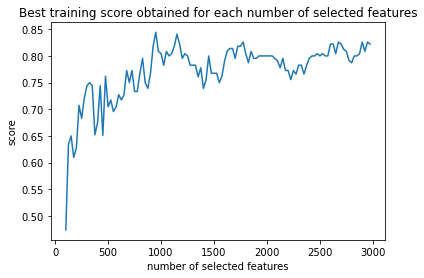

In [17]:
N = np.arange(100,3000,25)
best_subset, best_score = MIM(y, LK_exp1_d2_1, FamiliesClusters, compute_precision,True, N, 3, plot=True) 
print(len(best_subset), best_score)

In [18]:
#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = LK_exp1_d2_1[:, best_subset]
pred = model.fit_predict(x_subset,y)
print(model.score_, model.recovery)

subset = np.ones((len(best_subset),))
subsets = subsampling_genes(subset, 101, 0.25)

model = EnsemblingHierarchical(np.unique(y),compute_precision,True,subsets = subsets, ensembling='voting', threshold_voting = 0.5)
result  = model.fit_predict(X = x_subset, y= y)
print(model.score_, model.recovery)

0.8444444444444444 0.7692307692307693
0.8888888888888888 0.6153846153846154


In [19]:
MIM_sub = best_subset

In [20]:
get_best_genes_names(MIM_sub, '../data/processed_data/LK_exp1_d2_1genes_interest.csv', '../data/optimized_subsets/LK_exp1_d2_1genes_best1.csv')

2025 0.9130434782608695


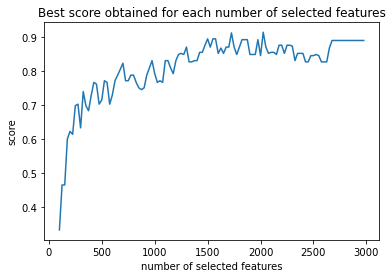

In [21]:
N = np.arange(100,3000,25)
best_subset, best_score = ANOVA(y, LK_exp1_d2_1, FamiliesClusters, compute_precision,True, N, plot=True)
print(len(best_subset), best_score)

In [22]:
#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = LK_exp1_d2_1[:, best_subset]
pred = model.fit_predict(x_subset,y)
print(model.score_, model.recovery)

subset = np.ones((len(best_subset),))
subsets = subsampling_genes(subset, 101, 0.25)

model = EnsemblingHierarchical(np.unique(y),compute_precision,True,subsets = subsets, ensembling='voting', threshold_voting = 0.5)
result  = model.fit_predict(X = x_subset, y= y)
print(model.score_, model.recovery)

0.9130434782608695 0.7863247863247863
0.9302325581395349 0.7350427350427351


1596 0.9130434782608695


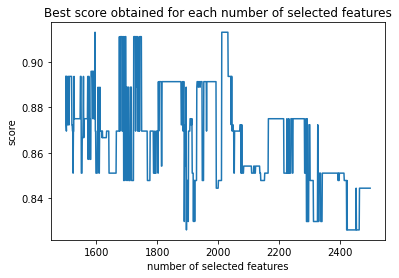

In [63]:
N = np.arange(1500,2500,1)
best_subset, best_score = ANOVA(y, LK_exp1_d2_1, FamiliesClusters, compute_precision,True, N, plot=True)
print(len(best_subset), best_score)

In [64]:
#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = LK_exp1_d2_1[:, best_subset]
pred = model.fit_predict(x_subset,y)
print(model.score_, model.recovery)

subset = np.ones((len(best_subset),))
subsets = subsampling_genes(subset, 101, 0.25)

model = EnsemblingHierarchical(np.unique(y),compute_precision,True,subsets = subsets, ensembling='voting', threshold_voting = 0.5)
result  = model.fit_predict(X = x_subset, y= y)
print(model.score_, model.recovery)

0.9130434782608695 0.7863247863247863
0.9302325581395349 0.7350427350427351


In [65]:
ANOVA_sub = best_subset

In [66]:
get_best_genes_names(ANOVA_sub, '../data/processed_data/LK_exp1_d2_1genes_interest.csv', '../data/optimized_subsets/LK_exp1_d2_1genes_best2.csv')

LK_exp1_d2_2

In [67]:
#Load data
norm_path = '../data/family_datasets/Weinreb_libraries_norm_lifted/' +  libraries_LK[1]
norm  = pyreadr.read_r(norm_path)
norm = norm[None]

family_info_path = '../data/family_datasets/Family_info/' + family_info_LK[1]
family_info = pyreadr.read_r(family_info_path)
family_info = np.array(family_info['WORK_clones'])
    
families, count = np.unique(family_info[:,0], return_counts=True)
family_interest = families[np.logical_and(count > 1, count < 6)]

#Conversion into array 
family_interest = np.array(family_interest)
family_info = np.array(family_info) 

#Norm data with only the cells belonging to the family of interest
cells_interest = []
for fam in family_interest:
    cell = family_info[fam == family_info[:,0]][:,1]
    cells_interest.append(cell)
cells_interest = [item for sublist in cells_interest for item in sublist]
        
norm = norm.loc[:,cells_interest]
y = pd.DataFrame(np.zeros((norm.shape[1],)), index= norm.columns)
family_info = pd.DataFrame(family_info[:,0], index = family_info[:,1])
y.loc[cells_interest] = family_info.loc[cells_interest]

#Remove all genes that are not expressed in at least percentage (default 50%) of the cells
gene_expressed = filter_norm_data(norm,0.05)
norm = norm[gene_expressed]

#Store the name of genes of interest
genes_interest = norm.index.values #get name of genes
genes_interest = pd.DataFrame(genes_interest)
genes_interest.to_csv('../data/processed_data/LK_exp1_d2_2genes_interest.csv', index=False)

LK_exp1_d2_2 = np.array(norm).T
y = np.squeeze(np.array(y))

print(LK_exp1_d2_2.shape, y.shape)

(194, 8075) (194,)


975 0.8472222222222222


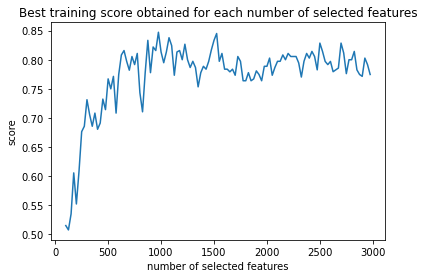

In [26]:
N = np.arange(100,3000,25)
best_subset, best_score = MIM(y, LK_exp1_d2_2, FamiliesClusters, compute_precision,True, N, 3, plot=True) 
print(len(best_subset), best_score)

In [27]:
#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = LK_exp1_d2_2[:, best_subset]
pred = model.fit_predict(x_subset,y)
print(model.score_, model.recovery)

subset = np.ones((len(best_subset),))
subsets = subsampling_genes(subset, 101, 0.25)

model = EnsemblingHierarchical(np.unique(y),compute_precision,True,subsets = subsets, ensembling='voting', threshold_voting = 0.5)
result  = model.fit_predict(X = x_subset, y= y)
print(model.score_, model.recovery)

0.8472222222222222 0.7422680412371134
0.9047619047619048 0.6494845360824743


In [28]:
MIM_sub = best_subset

In [29]:
get_best_genes_names(MIM_sub, '../data/processed_data/LK_exp1_d2_2genes_interest.csv', '../data/optimized_subsets/LK_exp1_d2_2genes_best1.csv')

775 0.9027777777777778


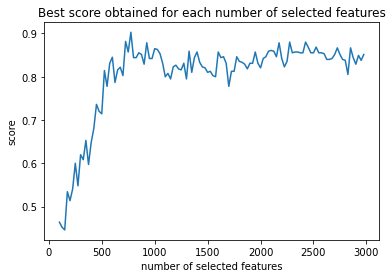

In [30]:
N = np.arange(100,3000,25)
best_subset, best_score = ANOVA(y, LK_exp1_d2_2, FamiliesClusters, compute_precision,True, N, plot=True)
print(len(best_subset), best_score)

In [31]:
#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = LK_exp1_d2_2[:, best_subset]
pred = model.fit_predict(x_subset,y)
print(model.score_, model.recovery)

subset = np.ones((len(best_subset),))
subsets = subsampling_genes(subset, 101, 0.25)

model = EnsemblingHierarchical(np.unique(y),compute_precision,True,subsets = subsets, ensembling='voting', threshold_voting = 0.5)
result  = model.fit_predict(X = x_subset, y= y)
print(model.score_, model.recovery)

0.9027777777777778 0.7422680412371134
0.921875 0.6597938144329897


775 0.9027777777777778


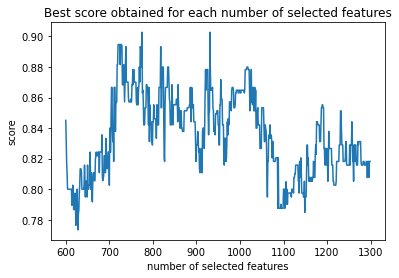

In [69]:
N = np.arange(600,1300,1)
best_subset, best_score = ANOVA(y, LK_exp1_d2_2, FamiliesClusters, compute_precision,True, N, plot=True)
print(len(best_subset), best_score)

In [70]:
#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = LK_exp1_d2_2[:, best_subset]
pred = model.fit_predict(x_subset,y)
print(model.score_, model.recovery)

subset = np.ones((len(best_subset),))
subsets = subsampling_genes(subset, 101, 0.25)

model = EnsemblingHierarchical(np.unique(y),compute_precision,True,subsets = subsets, ensembling='voting', threshold_voting = 0.5)
result  = model.fit_predict(X = x_subset, y= y)
print(model.score_, model.recovery)

0.9027777777777778 0.7422680412371134
0.90625 0.6597938144329897


In [71]:
ANOVA_sub = best_subset

In [72]:
get_best_genes_names(ANOVA_sub, '../data/processed_data/LK_exp1_d2_2genes_interest.csv', '../data/optimized_subsets/LK_exp1_d2_2genes_best2.csv')

LK_exp1_d2_3

In [73]:
#Load data
norm_path = '../data/family_datasets/Weinreb_libraries_norm_lifted/' +  libraries_LK[2]
norm  = pyreadr.read_r(norm_path)
norm = norm[None]

family_info_path = '../data/family_datasets/Family_info/' + family_info_LK[2]
family_info = pyreadr.read_r(family_info_path)
family_info = np.array(family_info['WORK_clones'])
    
families, count = np.unique(family_info[:,0], return_counts=True)
family_interest = families[np.logical_and(count > 1, count < 6)]

#Conversion into array 
family_interest = np.array(family_interest)
family_info = np.array(family_info) 

#Norm data with only the cells belonging to the family of interest
cells_interest = []
for fam in family_interest:
    cell = family_info[fam == family_info[:,0]][:,1]
    cells_interest.append(cell)
cells_interest = [item for sublist in cells_interest for item in sublist]
        
norm = norm.loc[:,cells_interest]
y = pd.DataFrame(np.zeros((norm.shape[1],)), index= norm.columns)
family_info = pd.DataFrame(family_info[:,0], index = family_info[:,1])
y.loc[cells_interest] = family_info.loc[cells_interest]

#Remove all genes that are not expressed in at least percentage (default 50%) of the cells
gene_expressed = filter_norm_data(norm,0.05)
norm = norm[gene_expressed]

#Store the name of genes of interest
genes_interest = norm.index.values #get name of genes
genes_interest = pd.DataFrame(genes_interest)
genes_interest.to_csv('../data/processed_data/LK_exp1_d2_3genes_interest.csv', index=False)

LK_exp1_d2_3 = np.array(norm).T
y = np.squeeze(np.array(y))

print(LK_exp1_d2_3.shape, y.shape)

(197, 7807) (197,)


475 0.7323943661971831


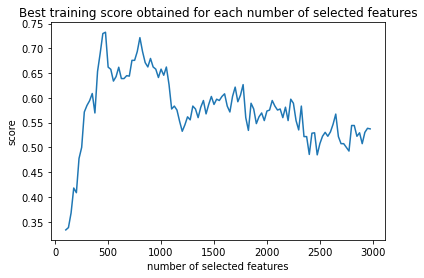

In [44]:
N = np.arange(100,3000,25)
best_subset, best_score = MIM(y, LK_exp1_d2_3, FamiliesClusters, compute_precision,True, N, 3, plot=True) 
print(len(best_subset), best_score)

In [45]:
#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = LK_exp1_d2_3[:, best_subset]
pred = model.fit_predict(x_subset,y)
print(model.score_, model.recovery)

subset = np.ones((len(best_subset),))
subsets = subsampling_genes(subset, 101, 0.25)

model = EnsemblingHierarchical(np.unique(y),compute_precision,True,subsets = subsets, ensembling='voting', threshold_voting = 0.5)
result  = model.fit_predict(X = x_subset, y= y)
print(model.score_, model.recovery)

0.7323943661971831 0.7208121827411168
0.84 0.5076142131979695


In [46]:
MIM_sub = best_subset

In [47]:
get_best_genes_names(MIM_sub, '../data/processed_data/LK_exp1_d2_3genes_interest.csv', '../data/optimized_subsets/LK_exp1_d2_3genes_best1.csv')

2425 0.75


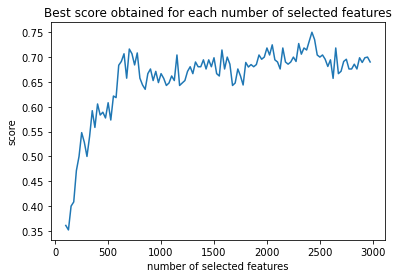

In [48]:
N = np.arange(100,3000,25)
best_subset, best_score = ANOVA(y, LK_exp1_d2_3, FamiliesClusters, compute_precision,True, N, plot=True)
print(len(best_subset), best_score)

In [49]:
#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = LK_exp1_d2_3[:, best_subset]
pred = model.fit_predict(x_subset,y)
print(model.score_, model.recovery)

subset = np.ones((len(best_subset),))
subsets = subsampling_genes(subset, 101, 0.25)

model = EnsemblingHierarchical(np.unique(y),compute_precision,True,subsets = subsets, ensembling='voting', threshold_voting = 0.5)
result  = model.fit_predict(X = x_subset, y= y)
print(model.score_, model.recovery)

0.75 0.6903553299492385
0.8035714285714286 0.5685279187817259


2422 0.75


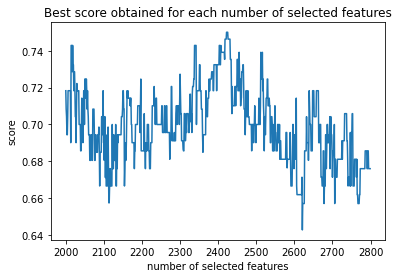

In [74]:
N = np.arange(2000,2800,1)
best_subset, best_score = ANOVA(y, LK_exp1_d2_3, FamiliesClusters, compute_precision,True, N, plot=True)
print(len(best_subset), best_score)

In [75]:
#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = LK_exp1_d2_3[:, best_subset]
pred = model.fit_predict(x_subset,y)
print(model.score_, model.recovery)

subset = np.ones((len(best_subset),))
subsets = subsampling_genes(subset, 101, 0.25)

model = EnsemblingHierarchical(np.unique(y),compute_precision,True,subsets = subsets, ensembling='voting', threshold_voting = 0.5)
result  = model.fit_predict(X = x_subset, y= y)
print(model.score_, model.recovery)

0.75 0.6903553299492385
0.8 0.5583756345177665


In [76]:
ANOVA_sub = best_subset

In [77]:
get_best_genes_names(ANOVA_sub, '../data/processed_data/LK_exp1_d2_3genes_interest.csv', '../data/optimized_subsets/LK_exp1_d2_3genes_best2.csv')

LK_exp1_d2

In [78]:
#Load data
norm_path = '../data/family_datasets/Weinreb_libraries_norm_lifted/' +  libraries_LK[3]
norm  = pyreadr.read_r(norm_path)
norm = norm[None]

family_info_path = '../data/family_datasets/Family_info/' + family_info_LK[3]
family_info = pyreadr.read_r(family_info_path)
family_info = np.array(family_info['WORK_clones'])
    
families, count = np.unique(family_info[:,0], return_counts=True)
family_interest = families[np.logical_and(count > 1, count < 6)]

#Conversion into array 
family_interest = np.array(family_interest)
family_info = np.array(family_info) 

#Norm data with only the cells belonging to the family of interest
cells_interest = []
for fam in family_interest:
    cell = family_info[fam == family_info[:,0]][:,1]
    cells_interest.append(cell)
cells_interest = [item for sublist in cells_interest for item in sublist]
        
norm = norm.loc[:,cells_interest]
y = pd.DataFrame(np.zeros((norm.shape[1],)), index= norm.columns)
family_info = pd.DataFrame(family_info[:,0], index = family_info[:,1])
y.loc[cells_interest] = family_info.loc[cells_interest]

#Remove all genes that are not expressed in at least percentage (default 50%) of the cells
gene_expressed = filter_norm_data(norm,0.05)
norm = norm[gene_expressed]

#Store the name of genes of interest
genes_interest = norm.index.values #get name of genes
genes_interest = pd.DataFrame(genes_interest)
genes_interest.to_csv('../data/processed_data/LK_exp1_d2genes_interest.csv', index=False)

LK_exp1_d2 = np.array(norm).T
y = np.squeeze(np.array(y))

print(LK_exp1_d2.shape, y.shape)

(244, 7892) (244,)


1325 0.8387096774193549


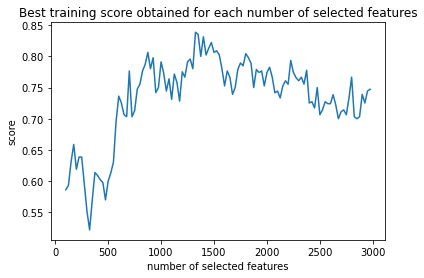

In [53]:
N = np.arange(100,3000,25)
best_subset, best_score = MIM(y, LK_exp1_d2, FamiliesClusters, compute_precision,True, N, 3, plot=True) 
print(len(best_subset), best_score)

In [54]:
#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = LK_exp1_d2[:, best_subset]
pred = model.fit_predict(x_subset,y)
print(model.score_, model.recovery)

subset = np.ones((len(best_subset),))
subsets = subsampling_genes(subset, 101, 0.25)

model = EnsemblingHierarchical(np.unique(y),compute_precision,True,subsets = subsets, ensembling='voting', threshold_voting = 0.5)
result  = model.fit_predict(X = x_subset, y= y)
print(model.score_, model.recovery)

0.8387096774193549 0.7622950819672131
0.922077922077922 0.6311475409836066


1404 0.8444444444444444


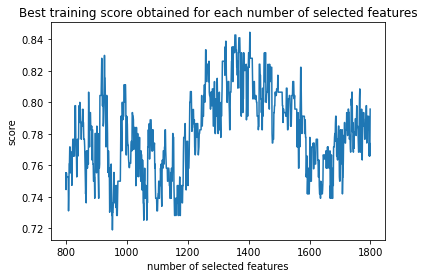

In [79]:
N = np.arange(800,1800,1)
best_subset, best_score = MIM(y, LK_exp1_d2, FamiliesClusters, compute_precision,True, N, 3, plot=True) 
print(len(best_subset), best_score)

In [80]:
#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = LK_exp1_d2[:, best_subset]
pred = model.fit_predict(x_subset,y)
print(model.score_, model.recovery)

subset = np.ones((len(best_subset),))
subsets = subsampling_genes(subset, 101, 0.25)

model = EnsemblingHierarchical(np.unique(y),compute_precision,True,subsets = subsets, ensembling='voting', threshold_voting = 0.5)
result  = model.fit_predict(X = x_subset, y= y)
print(model.score_, model.recovery)

0.8444444444444444 0.7377049180327869
0.9315068493150684 0.5983606557377049


In [81]:
MIM_sub = best_subset

In [82]:
get_best_genes_names(MIM_sub, '../data/processed_data/LK_exp1_d2genes_interest.csv', '../data/optimized_subsets/LK_exp1_d2genes_best1.csv')

2875 0.8255813953488372


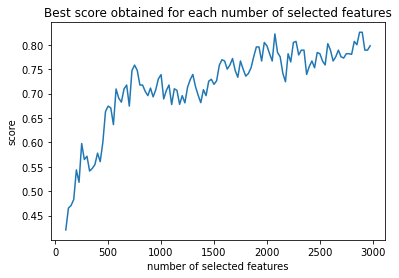

In [57]:
N = np.arange(100,3000,25)
best_subset, best_score = ANOVA(y, LK_exp1_d2, FamiliesClusters, compute_precision,True, N, plot=True)
print(len(best_subset), best_score)

In [58]:
#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = LK_exp1_d2[:, best_subset]
pred = model.fit_predict(x_subset,y)
print(model.score_, model.recovery)

subset = np.ones((len(best_subset),))
subsets = subsampling_genes(subset, 101, 0.25)

model = EnsemblingHierarchical(np.unique(y),compute_precision,True,subsets = subsets, ensembling='voting', threshold_voting = 0.5)
result  = model.fit_predict(X = x_subset, y= y)
print(model.score_, model.recovery)

0.8255813953488372 0.7049180327868853
0.875 0.5901639344262295


In [59]:
ANOVA_sub = best_subset

In [60]:
get_best_genes_names(ANOVA_sub, '../data/processed_data/LK_exp1_d2genes_interest.csv', '../data/optimized_subsets/LK_exp1_d2genes_best2.csv')